In [2]:
import pandas as pnd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pnd.read_csv("MyTable_marioagustin.csv",nrows=5000)

In [5]:
print(data['extinction_u'].min(),data['extinction_u'].max())
print(data['extinction_g'].min(),data['extinction_g'].max())
print(data['extinction_r'].min(),data['extinction_r'].max())
print(data['extinction_i'].min(),data['extinction_i'].max())
print(data['extinction_z'].min(),data['extinction_z'].max())

0.03137004 1.049351
0.02444332 0.8176469
0.01690978 0.5656444
0.01256578 0.4203344
0.009346629 0.3126516


In [6]:
data.columns

Index(['z', 'zerr', 'zwarning', 'modelMag_u', 'modelMag_g', 'modelMag_r',
       'modelMag_i', 'modelMag_z', 'extinction_u', 'extinction_g',
       'extinction_r', 'extinction_i', 'extinction_z', 'petroRad_u',
       'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'petroRadErr_u',
       'petroRadErr_g', 'petroRadErr_r', 'petroRadErr_i', 'petroRadErr_z',
       'petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z',
       'petroR50Err_u', 'petroR50Err_g', 'petroR50Err_r', 'petroR50Err_i',
       'petroR50Err_z', 'petroR90_u', 'petroR90_g', 'petroR90_r', 'petroR90_i',
       'petroR90_z', 'petroR90Err_u', 'petroR90Err_g', 'petroR90Err_r',
       'petroR90Err_i', 'petroR90Err_z'],
      dtype='object')

In [13]:
# Remove data with extreme outlier coordinates or negative fares
data = data.query('z > 0.01 and z < 1.0 and ' +
                  'modelMag_u > 0.0 and modelMag_u < 100.0 and ' +
                  'modelMag_g > 0.0 and modelMag_g < 100.0 and ' +
                  'modelMag_r > 0.0 and modelMag_r < 100.0 and ' +
                  'modelMag_i > 0.0 and modelMag_i < 100.0 and ' +
                  'modelMag_z > 0.0 and modelMag_z < 100.0 and ' +
                  'petroR90_u > 0.0 and petroR90_u < 100.0 and ' +
                  'petroR90_g > 0.0 and petroR90_g < 100.0 and ' +
                  'petroR90_r > 0.0 and petroR90_r < 100.0 and ' +
                  'petroR90_i > 0.0 and petroR90_i < 100.0 and ' +
                  'petroR90_z > 0.0 and petroR90_z < 100.0 and ' +
                  'petroR50_u > 0.0 and petroR50_u < 100.0 and ' +
                  'petroR50_g > 0.0 and petroR50_g < 100.0 and ' +
                  'petroR50_r > 0.0 and petroR50_r < 100.0 and ' +
                  'petroR50_i > 0.0 and petroR50_i < 100.0 and ' +
                  'petroR50_z > 0.0 and petroR50_z < 100.0'
                  )

data['color_u-g'] = data['modelMag_u']-data['modelMag_g']
data['color_g-r'] = data['modelMag_g']-data['modelMag_r']
data['color_g-i'] = data['modelMag_g']-data['modelMag_i']
data['color_i-z'] = data['modelMag_i']-data['modelMag_z']

y = data.z

base_features = ['modelMag_u',
                 'modelMag_g',
                 'modelMag_r',
                 'modelMag_i',
                 'modelMag_z',
                 'petroR90_u',
                 'petroR90_g',
                 'petroR90_r',
                 'petroR90_i',
                 'petroR90_z',
                 'petroR50_u',
                 'petroR50_g',
                 'petroR50_r',
                 'petroR50_i',
                 'petroR50_z',
                 'color_u-g',
                 'color_g-i',
                 'color_i-z',
                 'color_g-r']

In [14]:
X = data[base_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

# Environment Set-Up for feedback system.
#import sys
#sys.path.append('../input/ml-insights-tools')
#from learntools.core import binder
#binder.bind(globals())
#from ex2 import *
#print("Setup Complete")

# show data
print("Data sample:")
data.head()

Data sample:


,z,zerr,zwarning,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,extinction_u,extinction_g,...,petroR90_z,petroR90Err_u,petroR90Err_g,petroR90Err_r,petroR90Err_i,petroR90Err_z,color_u-g,color_g-r,color_g-i,color_i-z
2,0.096377,0.000009,0,18.55622,17.32955,16.57430,16.16316,15.83828,0.134622,0.104896,...,5.697326,0.830311,0.110717,0.097197,0.115310,0.362150,1.22667,0.75525,1.16639,0.32488
3,0.118569,0.000015,0,19.86500,18.27215,17.45637,17.07174,16.82843,0.163474,0.127378,...,4.071459,0.955760,0.194809,0.110761,0.122763,0.450587,1.59285,0.81578,1.20041,0.24331
4,0.118615,0.000016,0,19.86500,18.27215,17.45637,17.07174,16.82843,0.163474,0.127378,...,4.071459,0.955760,0.194809,0.110761,0.122763,0.450587,1.59285,0.81578,1.20041,0.24331
5,0.141460,0.000027,0,20.12505,17.94646,16.79356,16.31157,15.94484,0.166269,0.129555,...,6.920124,-1000.000000,0.444753,0.310404,0.298413,0.515684,2.17859,1.15290,1.63489,0.36673
6,0.141531,0.000027,0,20.12505,17.94646,16.79356,16.31157,15.94484,0.166269,0.129555,...,6.920124,-1000.000000,0.444753,0.310404,0.298413,0.515684,2.17859,1.15290,1.63489,0.36673


In [15]:
train_X.describe()

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_u,petroR90_g,petroR90_r,petroR90_i,petroR90_z,petroR50_u,petroR50_g,petroR50_r,petroR50_i,petroR50_z,color_u-g,color_g-i,color_i-z,color_g-r
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,19.506996,17.806577,16.927672,16.499841,16.189772,6.966540,6.906233,6.868303,6.778211,6.293250,3.071154,2.790285,2.660246,2.593177,2.421872,1.700419,1.306736,0.310069,0.878905
std,0.961236,0.796280,0.728010,0.725483,0.747247,3.945493,3.299884,3.203976,3.152726,2.774577,1.900506,1.526599,1.369724,1.365663,1.182222,0.400548,0.333722,0.111895,0.260878
min,15.276810,13.640640,12.732350,12.228080,11.897220,0.051977,0.961955,1.002983,1.123167,0.483662,0.029297,0.511301,0.560640,0.614037,0.273445,-0.833890,-0.970160,-2.122540,-0.449420
25%,18.933780,17.406245,16.601478,16.165835,15.834375,4.478416,4.956480,4.934462,4.877391,4.616673,1.935522,1.879906,1.815068,1.782201,1.721140,1.393790,1.117615,0.266250,0.709735
50%,19.534350,17.948540,17.121720,16.692260,16.375245,6.132684,6.144797,6.146103,6.067311,5.649203,2.666990,2.453335,2.341158,2.282387,2.176703,1.765475,1.339690,0.329255,0.900895
75%,20.171200,18.340873,17.440198,17.002973,16.684423,8.442829,8.033323,7.925465,7.832801,7.221609,3.681528,3.292708,3.131094,3.038615,2.784364,1.980920,1.524265,0.370402,1.046290
max,24.108960,24.190550,22.575780,21.279500,21.481380,54.218400,57.272040,56.779830,54.227680,30.453840,32.791110,31.649220,31.146510,28.783510,24.616050,4.729250,3.007530,2.804400,2.610720


In [16]:
train_y.describe()

count    3656.000000
mean        0.102374
std         0.052525
min         0.010282
25%         0.066722
50%         0.094009
75%         0.131577
max         0.732000
Name: z, dtype: float64

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.9693 ± 0.0446,color_g-r
0.1744 ± 0.0301,color_u-g
0.1486 ± 0.0205,color_g-i
0.0822 ± 0.0219,modelMag_g
0.0674 ± 0.0040,color_i-z
0.0562 ± 0.0376,modelMag_u
0.0177 ± 0.0034,modelMag_z
0.0103 ± 0.0008,modelMag_r
0.0070 ± 0.0005,modelMag_i
0.0044 ± 0.0032,petroR90_i


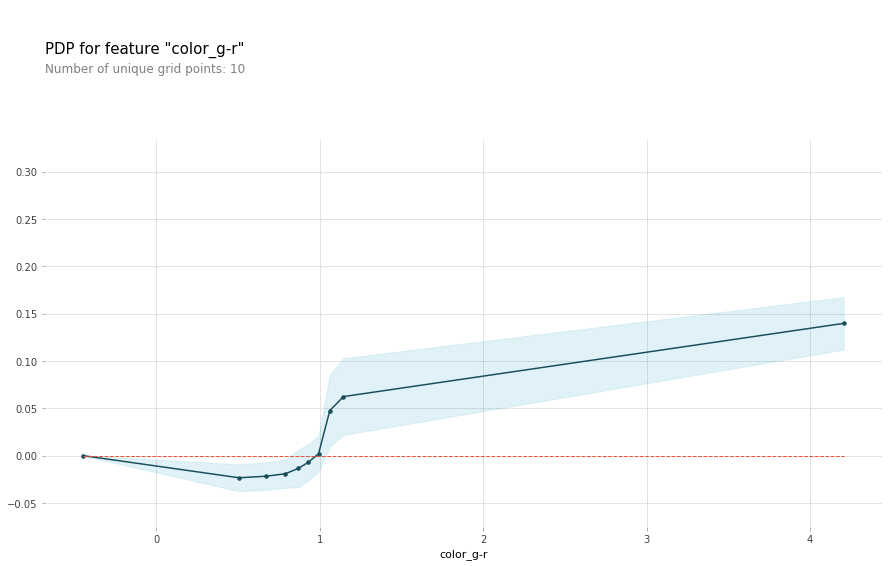

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'color_g-r'
pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

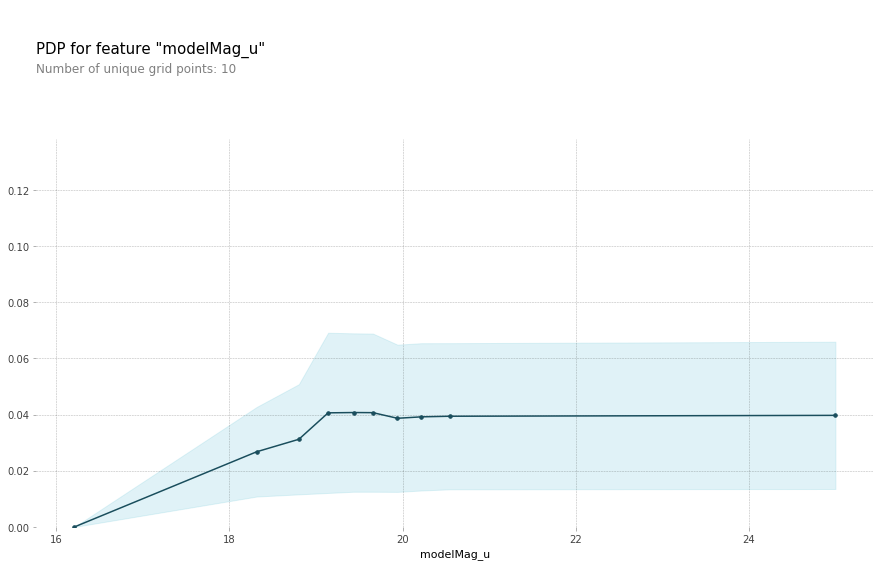

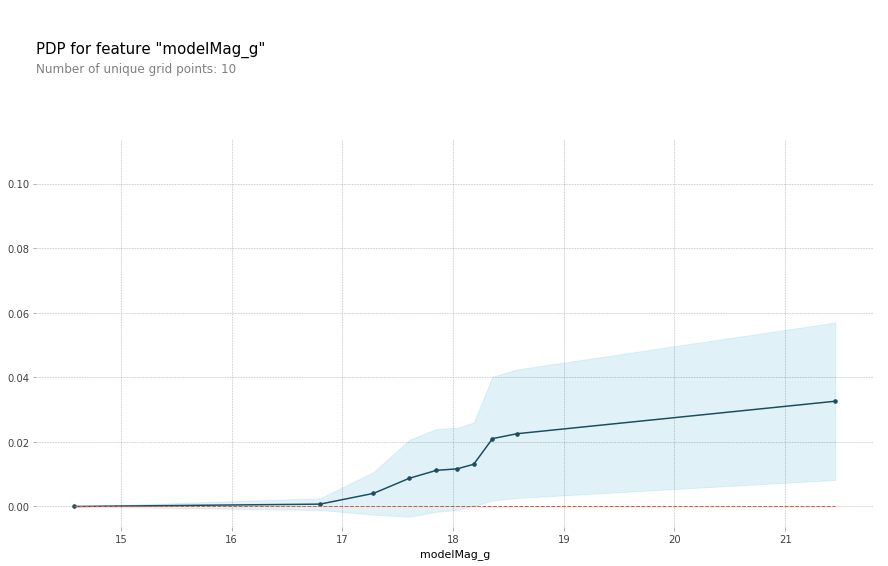

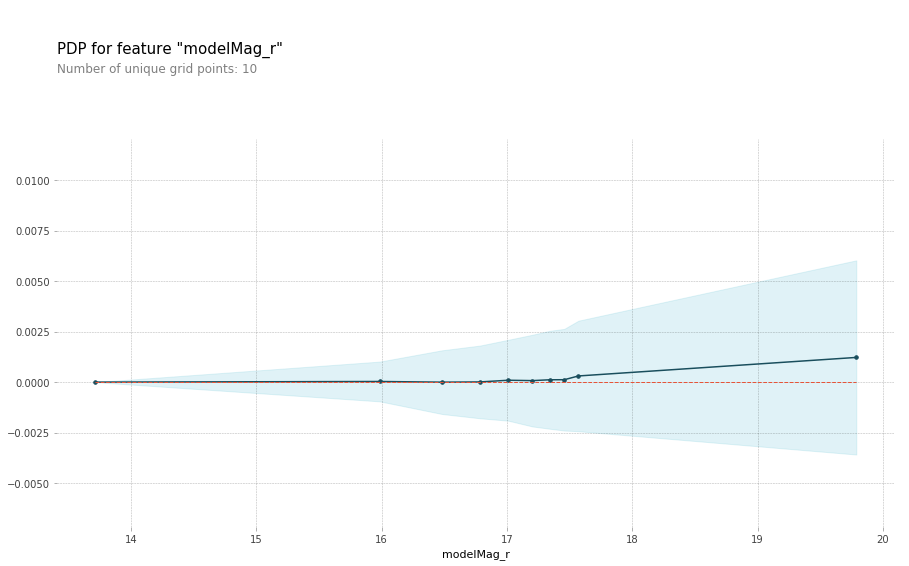

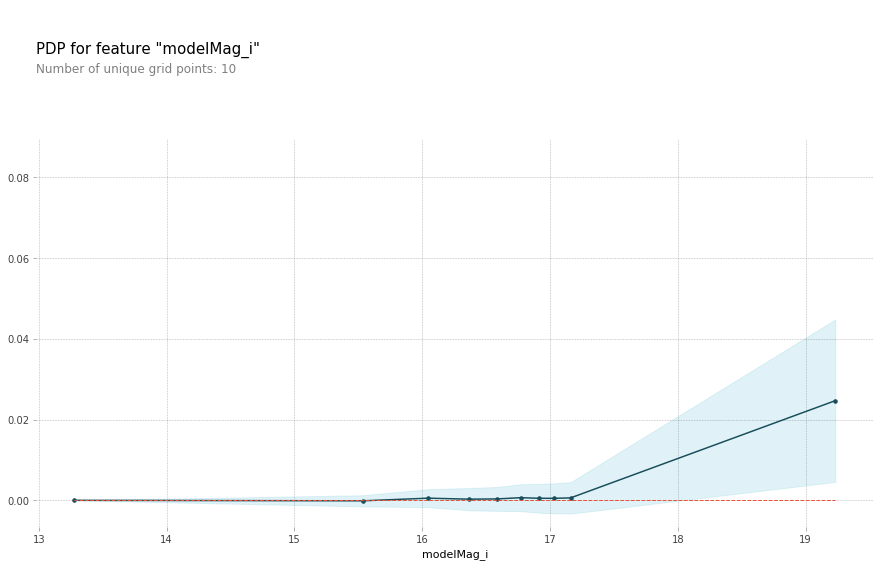

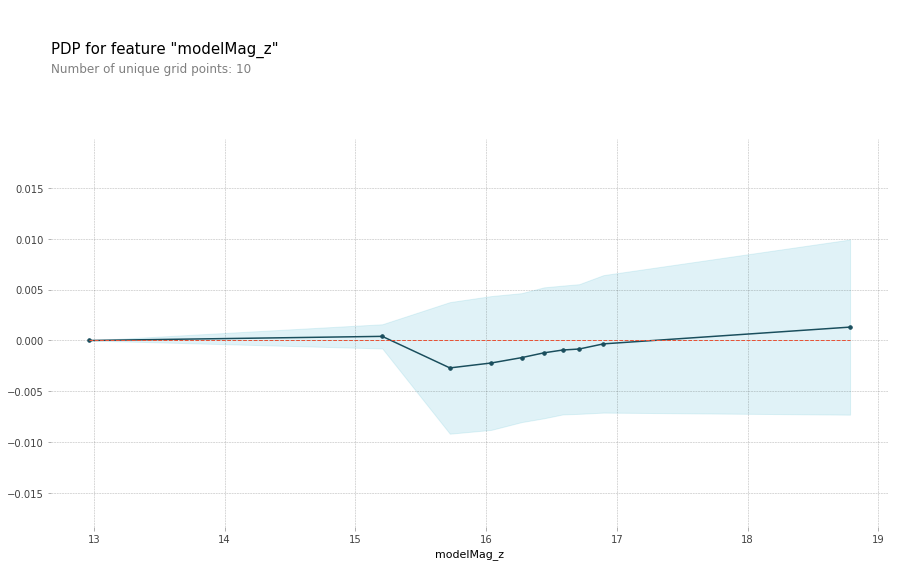

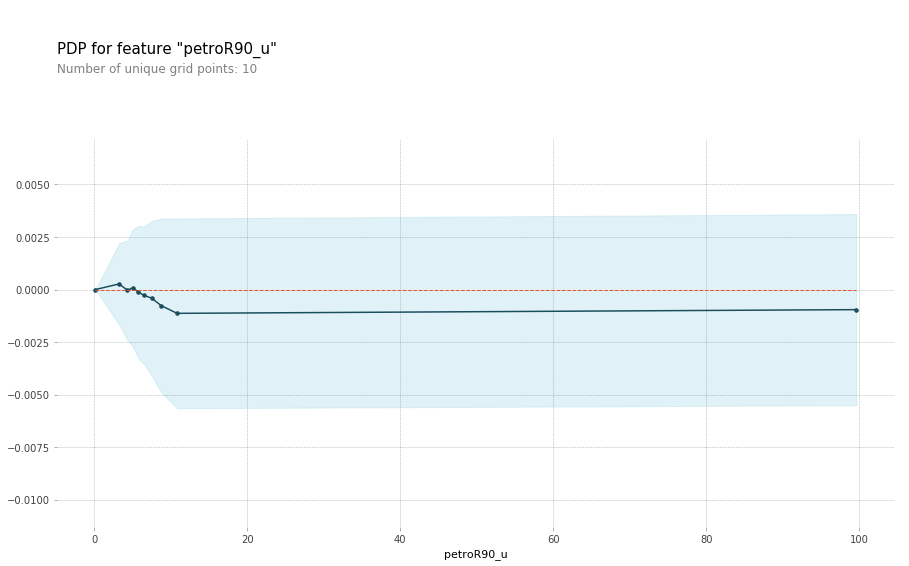

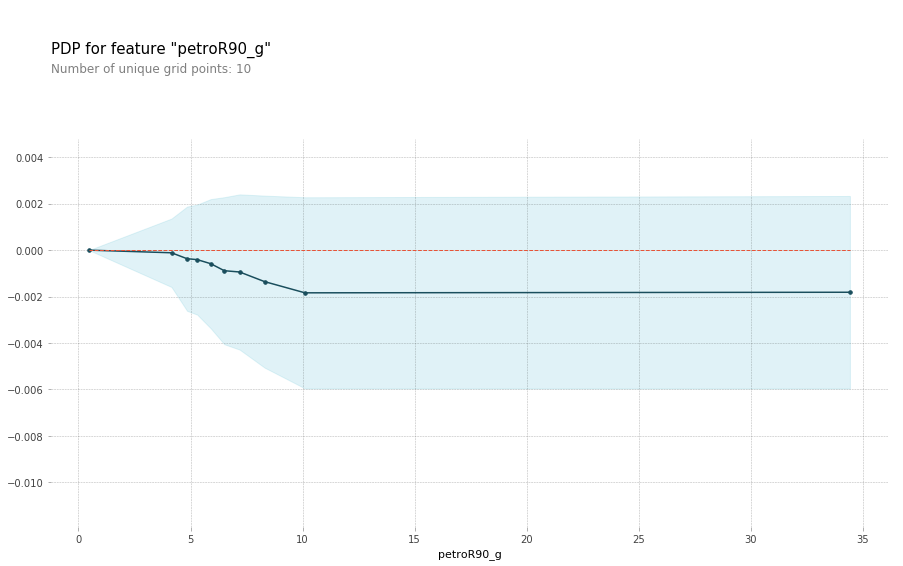

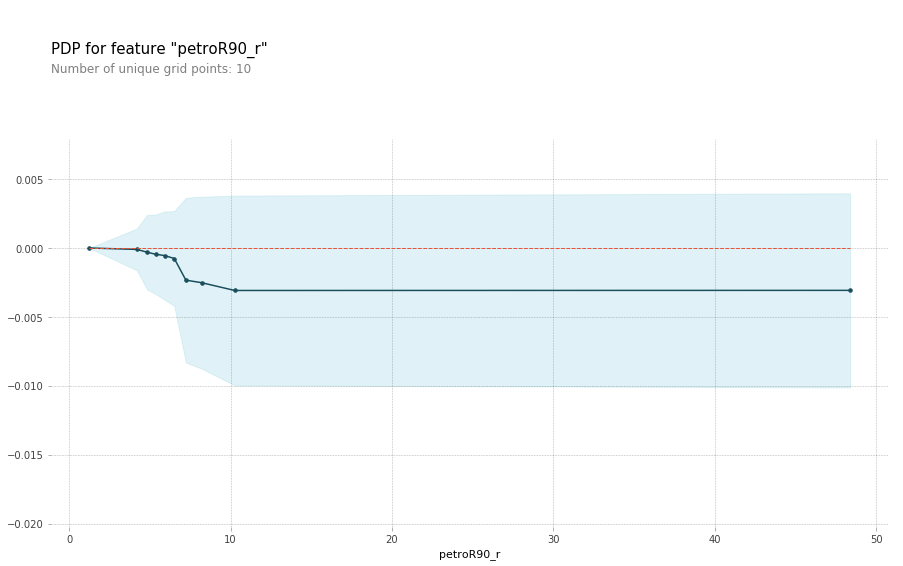

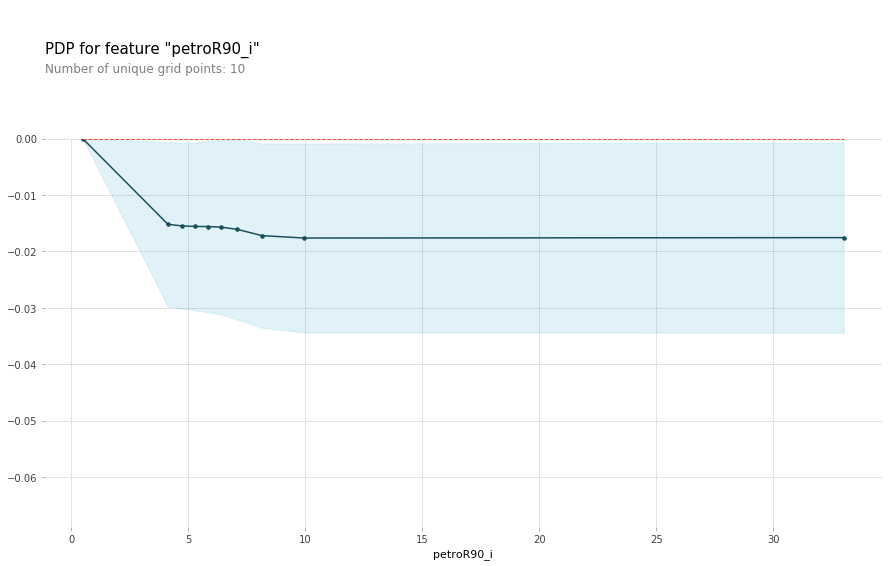

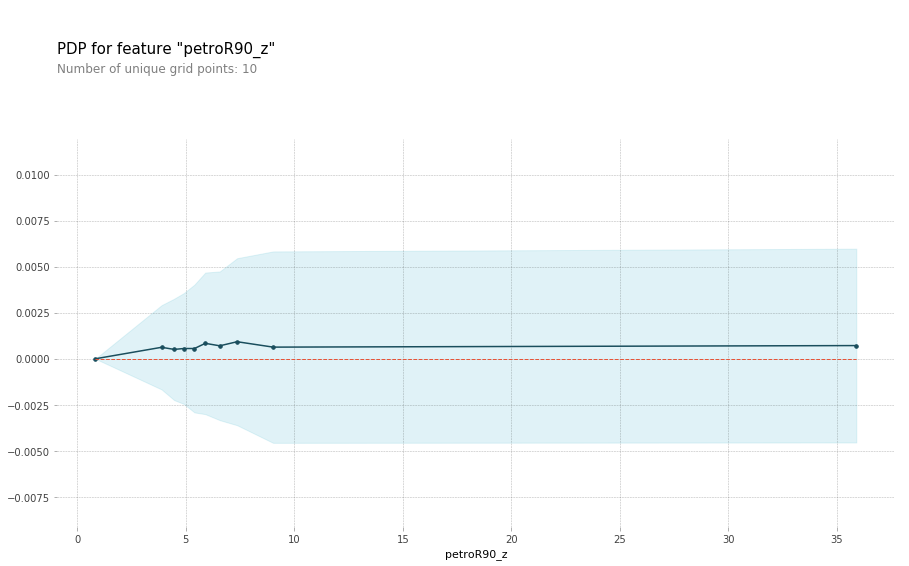

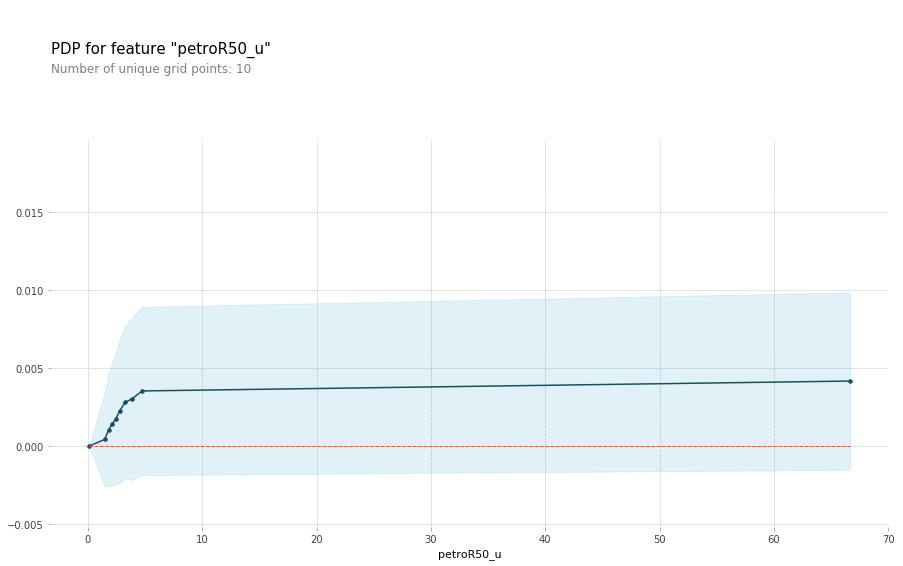

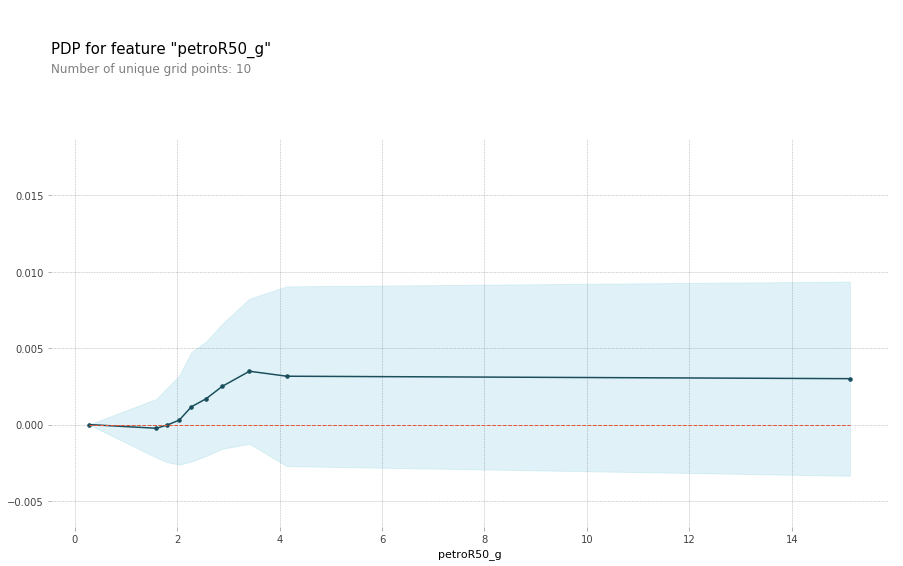

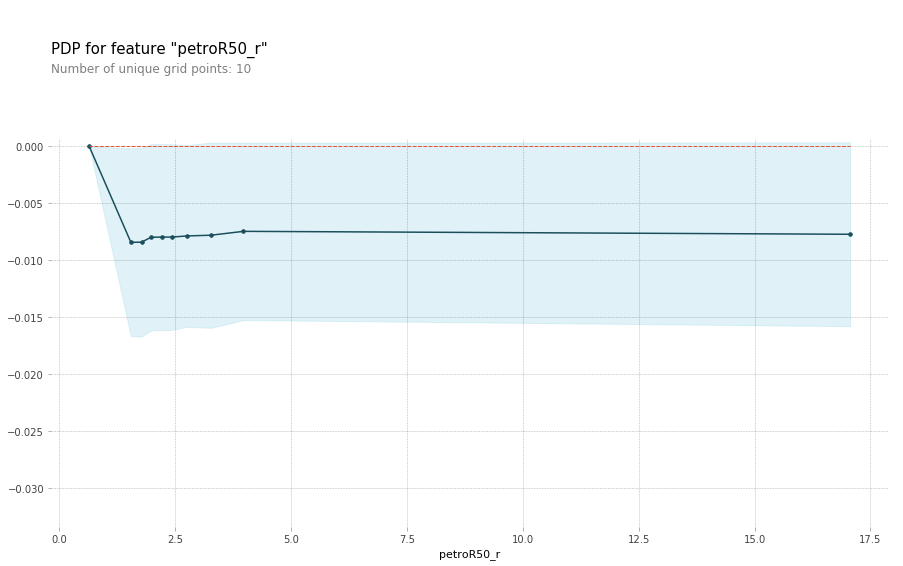

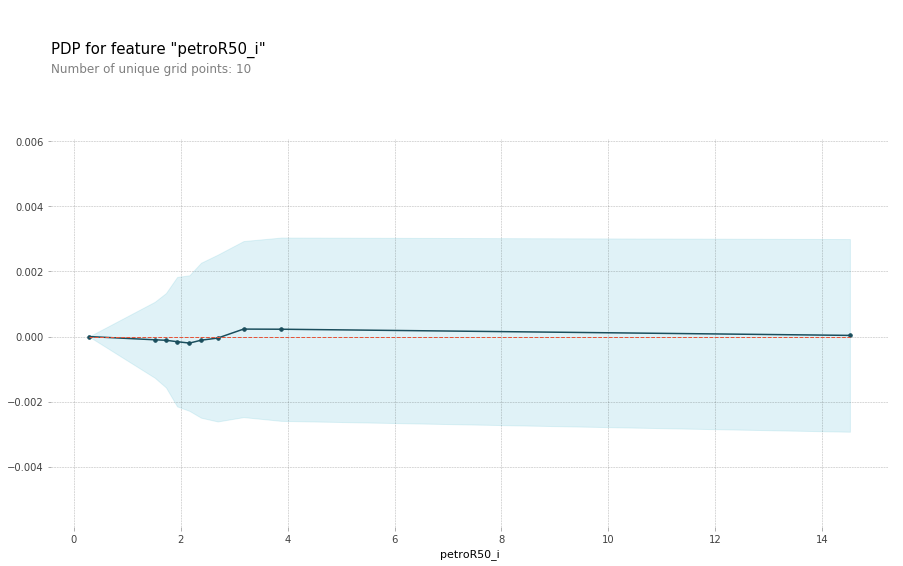

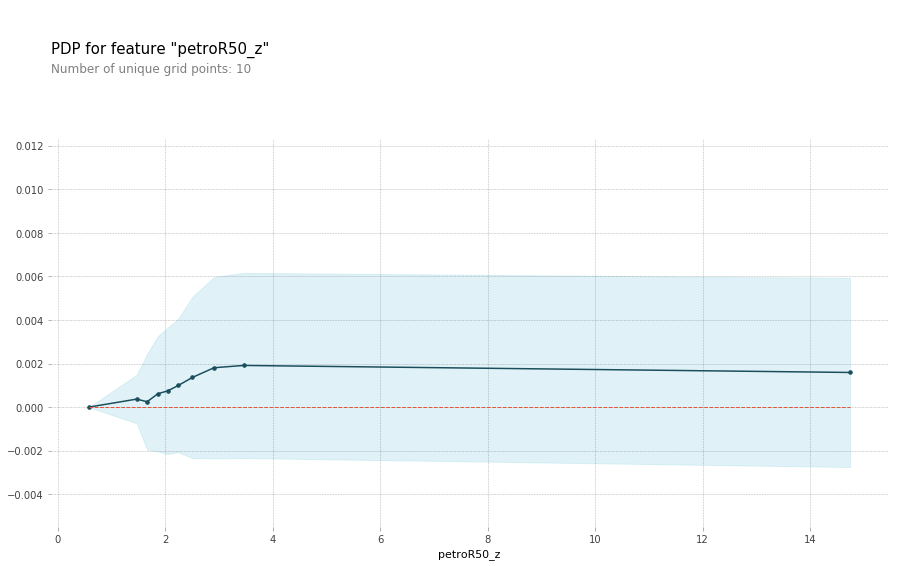

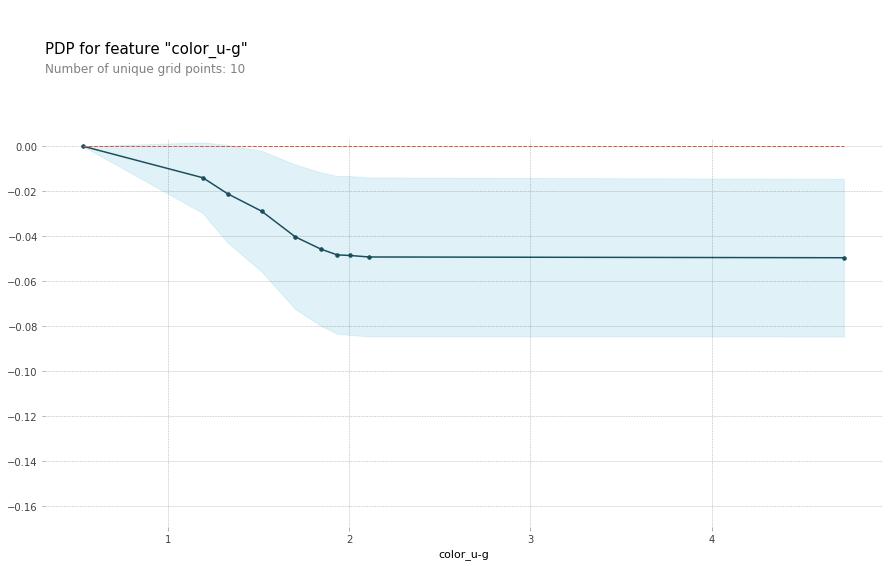

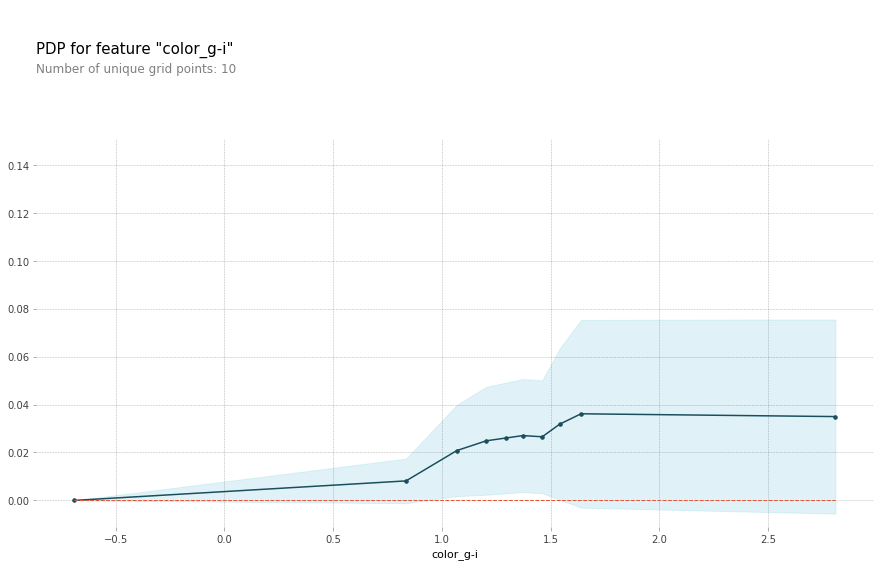

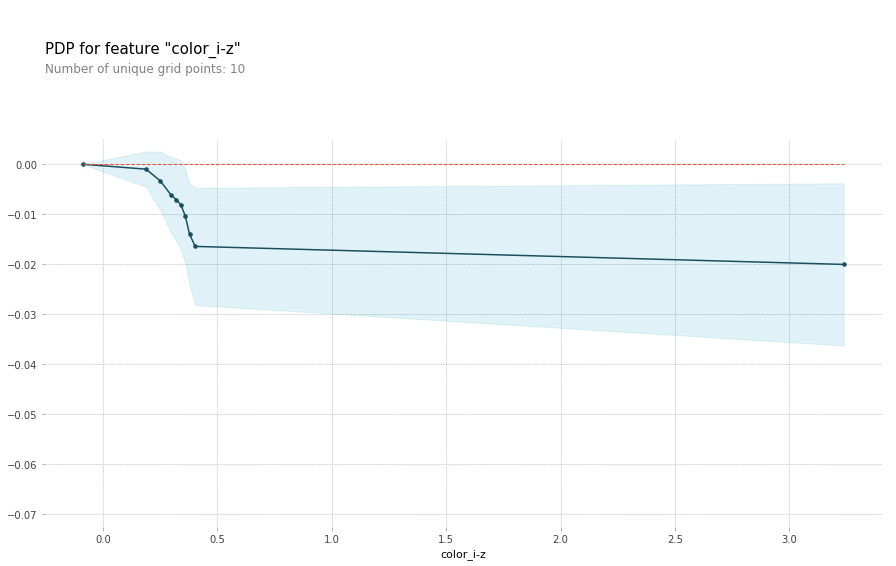

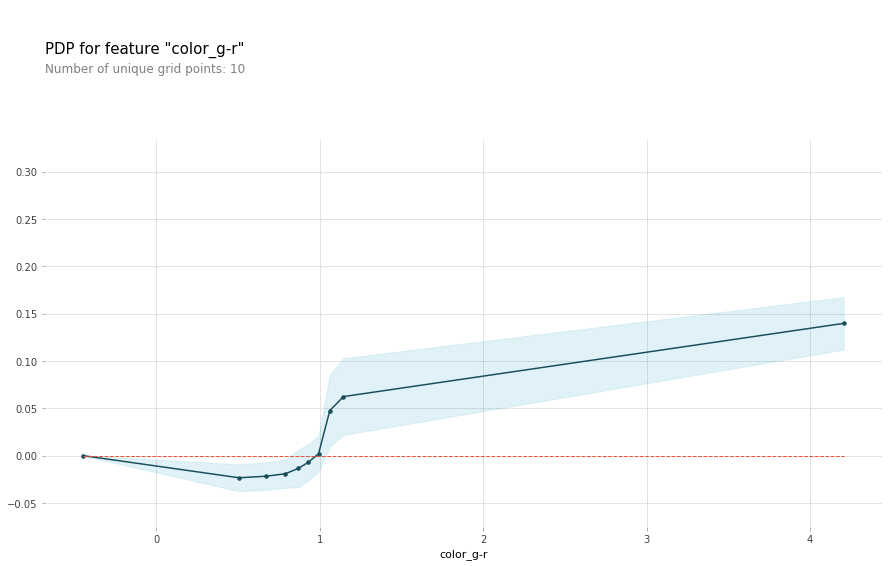

In [20]:
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

      modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z  petroR90_u  \
1540    19.35493    17.46802    16.50419    16.06150    15.70544    6.780824   
258     23.47824    21.45265    19.78702    19.23133    18.78293    0.680745   
4003    20.08726    18.17558    17.23792    16.83441    16.51758    5.083366   
4697    19.36858    18.15229    17.63178    17.31941    17.14637    6.687827   
2786    18.99152    17.47100    16.62550    16.10415    15.79107    4.848523   
742     20.34605    18.45591    17.30126    16.80393    16.44126    3.847597   
1431    19.43974    18.09289    17.40579    17.00810    16.82082    8.631155   
3526    20.46467    18.54287    17.46848    16.96014    16.54869    1.493953   
4925    19.66983    18.28394    17.45696    17.01878    16.67392    7.629215   
4766    20.22624    18.29260    17.27495    16.83752    16.47319    4.684476   

      petroR90_g  petroR90_r  petroR90_i  petroR90_z  petroR50_u  petroR50_g  \
1540    6.327887    6.113851    6.17445

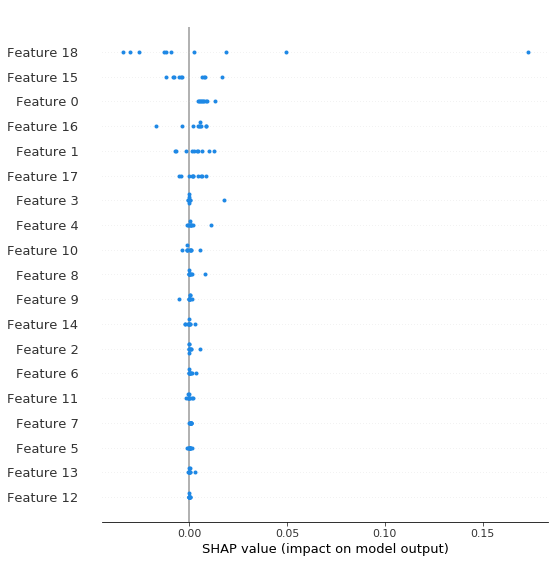

In [34]:
import shap  # package used to calculate Shap values

data_for_prediction = val_X.iloc[0:10,:].astype(float)  # use 1 row of data here. Could use multiple rows if desired

# Create object that can calculate shap values
explainer = shap.TreeExplainer(first_model)
shap_values = explainer.shap_values(data_for_prediction)
print(data_for_prediction)
print(shap_values)
print(explainer.expected_value)
shap.initjs()
#shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)
shap.summary_plot(shap_values)